1. 간이분석용
2. 매출액, 유동인구 데이터가 미확보 상태
3. 사용한 데이터 컬럼: 총인구수, 공시지가, 건축물수, 상권면적

# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANDotum.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 불러오기

In [2]:
file_path = 'C:/Users/user/Desktop/경기신용보증재단/정제/국토지리정보플랫폼/상권데이터/area 컬럼 붙임'

# 데이터 불러오기 전 파일 확인하기
file_list = os.listdir(file_path)
file_list.sort()
file_list = file_list[:-1]
file_list

['comm_201706_minmax_area.csv',
 'comm_201712_minmax_area.csv',
 'comm_201806_minmax_area.csv',
 'comm_201812_minmax_area.csv',
 'comm_201906_minmax_area.csv',
 'comm_201912_minmax_area.csv',
 'comm_202006_minmax_area.csv',
 'comm_202012_minmax_area.csv',
 'comm_202106_minmax_area.csv',
 'comm_202112_minmax_area.csv']

상권인근격자데이터  
2017년 6월 ~ 2021년 12월  
2017년 6월의 경우 건축물 데이터 없음  
2021년 12월의 경우 공시지가 데이터 없음

In [3]:
## 데이터 불러오기 ##

file_list_name = []
for i in file_list:
    file_list_name.append(file_path+'/'+i)


file_list_ym = []
for i in range(len(file_list)):
    file_list_ym.append(file_list[i][5:11]) #기준년월추출
    
# comm_기준년월
for i in range(len(file_list)):
    globals()['comm_{}'.format(file_list_ym[i])] = pd.read_csv(file_list_name[i], encoding='cp949') #commercial area를 줄여서 comm

# EDA

In [4]:
comm_201912.head()

,상권명,다중지역정보,업종정보,점포수,위도,경도,구분,wkt,price_201912_max,pop_201912_max,strc_201912_max,price_201912_min,pop_201912_min,strc_201912_min,price_201912_mean,pop_201912_mean,strc_201912_mean,area
0,성남은행초등학교,"{""type"":""Polygon"",""coordinates"":[[[127.1687262...",두발 미용업/일반 교과학원/치킨 전문점/한식 일반 음식점업/노래 연습장 운영업/기타...,133,37.460705,127.168758,골목상권,"POLYGON ((127.1687262760 37.4620601200, 127.16...",34488098.54,5181.0,302.0,12753433.67,2391.0,187.0,2.362077e+07,3786.0,244.5,74330.385443
1,가림로201번안길,"{""type"":""Polygon"",""coordinates"":[[[126.8617425...",전자상거래 소매업/기타 음ㆍ식료품 위주 종합 소매업/자동차 세차업/두발 미용업,5,37.475776,126.861436,골목상권,"POLYGON ((126.8617425380 37.4748298650, 126.86...",24293613.59,4138.0,428.0,4185349.50,603.0,74.0,1.423948e+07,2370.5,251.0,44415.177380
2,내각1로73번안길,"{""type"":""Polygon"",""coordinates"":[[[127.1649527...",한식 일반 음식점업/두발 미용업/부동산 중개 및 대리업/한식 육류 요리 전문점/노래...,62,37.711797,127.161510,골목상권,"POLYGON ((127.1649527610 37.7043120880, 127.16...",14360212.44,2882.0,333.0,7454876.87,1127.0,157.0,1.090754e+07,2004.5,245.0,425896.298534
3,양주산성로,"{""type"":""Polygon"",""coordinates"":[[[126.9873577...",두발 미용업/일반 교과학원/화초 및 식물 소매업/통신기기 소매업/한식 육류 요리 전...,37,37.788623,126.987220,골목상권,"POLYGON ((126.9873577160 37.7908375740, 126.98...",8767921.91,59.0,37.0,4396011.56,36.0,15.0,6.581967e+06,47.5,26.0,162098.769930
4,도일로135번길,"{""type"":""Polygon"",""coordinates"":[[[126.7835814...",두발 미용업/치킨 전문점/체인화 편의점/한식 일반 음식점업/기타 음ㆍ식료품 위주 종...,26,37.343110,126.783057,골목상권,"POLYGON ((126.7835814060 37.3430218760, 126.78...",11253120.41,3989.0,154.0,4695407.43,1598.0,85.0,7.974264e+06,2793.5,119.5,41766.672867


In [5]:
comm_201912.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상권명                1684 non-null   object 
 1   다중지역정보             1684 non-null   object 
 2   업종정보               1684 non-null   object 
 3   점포수                1684 non-null   int64  
 4   위도                 1684 non-null   float64
 5   경도                 1684 non-null   float64
 6   구분                 1684 non-null   object 
 7   wkt                1684 non-null   object 
 8   price_201912_max   1684 non-null   float64
 9   pop_201912_max     1684 non-null   float64
 10  strc_201912_max    1684 non-null   float64
 11  price_201912_min   1684 non-null   float64
 12  pop_201912_min     1684 non-null   float64
 13  strc_201912_min    1684 non-null   float64
 14  price_201912_mean  1684 non-null   float64
 15  pop_201912_mean    1684 non-null   float64
 16  strc_201912_mean   1684 

In [6]:
comm_201912.describe(include='all')

,상권명,다중지역정보,업종정보,점포수,위도,경도,구분,wkt,price_201912_max,pop_201912_max,strc_201912_max,price_201912_min,pop_201912_min,strc_201912_min,price_201912_mean,pop_201912_mean,strc_201912_mean,area
count,1684,1684,1684,1684.000000,1684.000000,1684.000000,1684,1684,1.684000e+03,1684.000000,1684.000000,1.684000e+03,1684.000000,1684.000000,1.684000e+03,1684.000000,1684.000000,1.684000e+03
unique,1600,1684,1683,NaN,NaN,NaN,2,1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,중앙로,"{""type"":""Polygon"",""coordinates"":[[[127.1687262...",기타 음ㆍ식료품 위주 종합 소매업/커피 전문점,NaN,NaN,NaN,발달상권,"POLYGON ((127.1687262760 37.4620601200, 127.16...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,1,2,NaN,NaN,NaN,857,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,119.799881,37.431267,127.008034,NaN,NaN,2.292755e+07,2247.068290,189.938242,9.973685e+06,922.025534,98.728029,1.645062e+07,1584.546912,144.333135,8.221099e+04
std,NaN,NaN,NaN,149.655865,0.227309,0.195303,NaN,NaN,1.957086e+07,1968.774265,188.024356,1.115952e+07,1052.225641,113.925963,1.503139e+07,1466.118614,148.225783,1.517408e+05
min,NaN,NaN,NaN,0.000000,36.945124,126.553514,NaN,NaN,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.010358e+04
25%,NaN,NaN,NaN,34.000000,37.281268,126.836811,NaN,NaN,1.105200e+07,901.500000,67.000000,3.665229e+06,220.000000,24.000000,7.552320e+06,585.750000,48.000000,2.739101e+04
50%,NaN,NaN,NaN,67.000000,37.391299,127.025823,NaN,NaN,1.701397e+07,1700.500000,135.000000,6.782957e+06,596.000000,63.000000,1.189996e+07,1168.250000,100.250000,4.702469e+04
75%,NaN,NaN,NaN,147.000000,37.622572,127.117096,NaN,NaN,2.869979e+07,3010.000000,246.500000,1.242728e+07,1249.250000,129.250000,2.019869e+07,2123.750000,186.000000,8.260934e+04


In [7]:
comm_list = []
for i in file_list_ym:
    comm_list.append('comm_'+i)

comm_list

['comm_201706',
 'comm_201712',
 'comm_201806',
 'comm_201812',
 'comm_201906',
 'comm_201912',
 'comm_202006',
 'comm_202012',
 'comm_202106',
 'comm_202112']

In [8]:
# 각 데이터 별 0인 값들 개수 확인

null_list = []
for i in [comm_201706, comm_201712, comm_201806, comm_201812, 
          comm_201906, comm_201912, comm_202006, comm_202012, 
          comm_202106, comm_202112]:
    length_list = []
    for j in i.columns:
        length_list.append(len(i[i[j]==0]))
        
    null_list.append(length_list)
    
null_df = pd.DataFrame(null_list)
null_df.columns = ['상권명', '다중지역정보', '업종정보', '점포수', '위도',' 경도', '구분', 'wkt',
                  'price_max', 'pop_max', 'strc_max',  'price_min', 'pop_min', 'strc_min', 'price_mean', 'pop_mean', 'strc_mean', 'area']
null_df.index = comm_list

null_df

,상권명,다중지역정보,업종정보,점포수,위도,경도,구분,wkt,price_max,pop_max,strc_max,price_min,pop_min,strc_min,price_mean,pop_mean,strc_mean,area
comm_201706,0,0,0,3,0,0,0,0,0,18,1684,28,106,1684,0,18,1684,0
comm_201712,0,0,0,3,0,0,0,0,8,16,1,37,100,33,8,16,1,0
comm_201806,0,0,0,3,0,0,0,0,11,15,0,40,105,31,11,15,0,0
comm_201812,0,0,0,3,0,0,0,0,0,16,1,28,106,33,0,5,1,0
comm_201906,0,0,0,3,0,0,0,0,3,14,1,31,109,33,3,14,1,0
comm_201912,0,0,0,3,0,0,0,0,3,12,0,32,104,34,3,12,0,0
comm_202006,0,0,0,3,0,0,0,0,3,12,0,32,102,34,3,12,0,0
comm_202012,0,0,0,3,0,0,0,0,0,13,0,28,98,34,0,13,0,0
comm_202106,0,0,0,3,0,0,0,0,0,13,0,28,98,34,0,13,0,0
comm_202112,0,0,0,3,0,0,0,0,1684,15,0,1684,103,35,1684,15,0,0


0 값이 제일 많이 없는 max 데이터 이용

In [9]:
temp_list = []
for j in [comm_201706, comm_201712, comm_201806, comm_201812, 
          comm_201906, comm_201912, comm_202006, comm_202012, 
          comm_202106, comm_202112]:
    temp_list.append(list(j.shape))

comm_data_shape = pd.DataFrame(temp_list)
comm_data_shape.columns = ['행', '열']
comm_data_shape.index = comm_list

comm_data_shape

,행,열
comm_201706,1684,18
comm_201712,1684,18
comm_201806,1684,18
comm_201812,1684,18
comm_201906,1684,18
comm_201912,1684,18
comm_202006,1684,18
comm_202012,1684,18
comm_202106,1684,18
comm_202112,1684,18


상권의 경우 2022-09-26을 기준으로 하고 있어 상권의 변화는 체크하지 않음  
따라서 상권명, 다중지역정보, 업종정보, 점포수, 위도, 경도는 기준년월마다 차이가 있는 정보가 아니므로 하나만 체크

In [10]:
comm_data_golmok = [] 
comm_data_baldal = [] 
for j in [comm_201706, comm_201712, comm_201806, comm_201812, 
          comm_201906, comm_201912, comm_202006, comm_202012, 
          comm_202106, comm_202112]:
    comm_data_golmok.append(j['구분'].value_counts()[1])
    comm_data_baldal.append(j['구분'].value_counts()[0])
    
comm_data_section = pd.DataFrame({'골목상권': comm_data_golmok, '발달상권': comm_data_baldal})
comm_data_section.index = comm_list
comm_data_section

,골목상권,발달상권
comm_201706,827,857
comm_201712,827,857
comm_201806,827,857
comm_201812,827,857
comm_201906,827,857
comm_201912,827,857
comm_202006,827,857
comm_202012,827,857
comm_202106,827,857
comm_202112,827,857


## 데이터 재배치

In [11]:
comm_201912.columns

Index(['상권명', '다중지역정보', '업종정보', '점포수', '위도', '경도', '구분', 'wkt',
       'price_201912_max', 'pop_201912_max', 'strc_201912_max',
       'price_201912_min', 'pop_201912_min', 'strc_201912_min',
       'price_201912_mean', 'pop_201912_mean', 'strc_201912_mean', 'area'],
      dtype='object')

In [12]:
for df in [comm_201706, comm_201712, comm_201806, comm_201812, 
              comm_201906, comm_201912, comm_202006, comm_202012, 
              comm_202106, comm_202112]:
    col_fix = df.columns[:8].to_list() # 상권정보 컬럼
    col_grid = df.columns[8:11].to_list() # 격자 기준으로 상권에 인구, 건축물, 공시지가 융합한 컬럼
    col_point = df.columns[11:14].to_list() # 포인트 기준으로 상권에 인구, 건축물, 공시지가 융합한 컬럼
    col_mean = df.columns[14:17].to_list() # 두 기준을 평균 낸 수치 컬럼

    grid_col=col_fix+col_grid
    grid_col.append(df.columns[-1]) # area 컬럼 
    
    point_col=col_fix+col_point
    point_col.append(df.columns[-1]) # area 컬럼 
    
    mean_col = col_fix+col_mean
    mean_col.append(df.columns[-1]) # area 컬럼 

    ym = col_grid[1][4:10] # 년월 추출
    
    globals()['comm_max_{}'.format(ym)] = df[grid_col] # 격자 기준으로 상권에 인구, 건축물, 공시지가 융합
    globals()['comm_min_{}'.format(ym)] = df[point_col] # 포인트 기준으로 상권에 인구, 건축물, 공시지가 융합
    globals()['comm_mean_{}'.format(ym)] = df[mean_col] # 두 기준을 평균 낸 수치


In [13]:
# 격자 기준 -> max
comm_max_201912.columns

Index(['상권명', '다중지역정보', '업종정보', '점포수', '위도', '경도', '구분', 'wkt',
       'price_201912_max', 'pop_201912_max', 'strc_201912_max', 'area'],
      dtype='object')

# normalization

## 발생확률

In [14]:
for df in [comm_max_201706, comm_max_201712, comm_max_201806, comm_max_201812,
           comm_max_201906, comm_max_201912, comm_max_202006, comm_max_202012, 
           comm_max_202106, comm_max_202112]:  
    max # standardization
    before = df.iloc[:,-4:] # scaling 대상
    temp_df = pd.DataFrame()
    for c in before.columns:
        temp_df[c] = before[c]/sum(before[c]) # 발생확률
    after = temp_df
    
    # 변수명 변경
    col = []
    for item in df.columns[-4:-1]:
        #문자열 치환
        item_mod = item.replace("max", "p")
        # 새로운 리스트에 추가
        col.append(item_mod)    
    col.append(df.columns[-1]+'_p')
    
    # 데이터프레임 생성
    standardization_df = pd.DataFrame(after) 
    standardization_df.columns = col
    ym = col[1][4:10] # 년월 추출
    globals()['comm_max_p_{}'.format(ym)] = pd.concat([df,standardization_df],axis=1) # 기존 상권데이터에 붙임

In [15]:
# 2019년 12월의 데이터 standardization 값
comm_max_p_201912.iloc[:,-4:]

,price_201912_p,pop_201912_p,strc_201912_p,area_p
0,0.000893,0.001369,0.000944,0.000537
1,0.000629,0.001094,0.001338,0.000321
2,0.000372,0.000762,0.001041,0.003076
3,0.000227,0.000016,0.000116,0.001171
4,0.000291,0.001054,0.000481,0.000302
...,...,...,...,...
1679,0.000876,0.000876,0.000866,0.000205
1680,0.000384,0.000261,0.000066,0.000103
1681,0.000675,0.000501,0.000063,0.000264
1682,0.000639,0.000087,0.000231,0.000298


In [16]:
# 각 컬럼의 합계는 1
comm_max_p_201912.iloc[:,-4:].sum()

price_201912_p    1.0
pop_201912_p      1.0
strc_201912_p     1.0
area_p            1.0
dtype: float64

## minmax scaling

In [17]:
# 패키지로드
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
scaler = MinMaxScaler()
# (x - x.min)/(x.max - x.min)

for df in [comm_max_201706, comm_max_201712, comm_max_201806, comm_max_201812,
           comm_max_201906, comm_max_201912, comm_max_202006, comm_max_202012, 
           comm_max_202106, comm_max_202112]:
    
    # minmax scale
    before = df.iloc[:,-4:] # scaling 대상
    after = scaler.fit_transform(before) 
    
    # 변수명 변경
    minmax_col = []
    for item in df.columns[-4:-1]:
        #문자열 치환
        item_mod = item.replace("max", "minmax")
        # 새로운 리스트에 추가
        minmax_col.append(item_mod)
    minmax_col.append(df.columns[-1]+'_minmax')
    
   # minmax 데이터프레임 생성
    minmax_df = pd.DataFrame(after, columns = minmax_col)
    ym = minmax_col[1][4:10] # 년월 추출
    globals()['comm_max_m_{}'.format(ym)] = pd.concat([df,minmax_df],axis=1) # 기존 상권데이터에 붙임

In [19]:
# 2019년 6월의 데이터 min-max scaling 값
comm_max_m_201912.iloc[:,-4:]

,price_201912_minmax,pop_201912_minmax,strc_201912_minmax,area_minmax
0,0.168204,0.324177,0.178001,0.022656
1,0.118484,0.258916,0.252513,0.012103
2,0.070037,0.180328,0.196334,0.146671
3,0.042763,0.003692,0.021289,0.053616
4,0.054883,0.249593,0.090479,0.011169
...,...,...,...,...
1679,0.164994,0.207358,0.163217,0.006450
1680,0.072320,0.061882,0.011827,0.001483
1681,0.127171,0.118508,0.011236,0.009308
1682,0.120286,0.020523,0.043170,0.010965


In [20]:
comm_max_m_201912.iloc[:, -4:].describe()

,price_201912_minmax,pop_201912_minmax,strc_201912_minmax,area_minmax
count,1684.000000,1684.000000,1684.000000,1684.000000
mean,0.111821,0.140600,0.111732,0.025436
std,0.095450,0.123187,0.111191,0.053526
min,0.000000,0.000000,0.000000,0.000000
25%,0.053902,0.056407,0.039030,0.006098
50%,0.082980,0.106401,0.079243,0.013024
75%,0.139974,0.188337,0.145180,0.025576
max,1.000000,1.000000,1.000000,1.000000


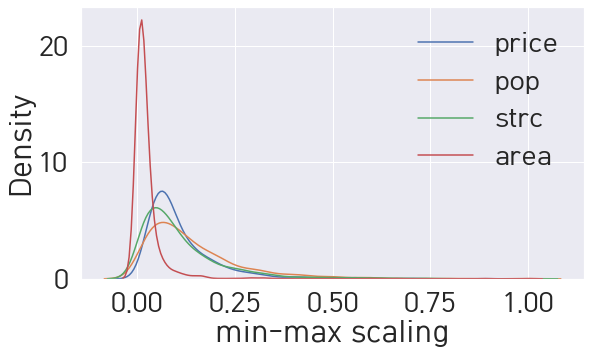

In [21]:
# create a figure
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(comm_max_m_201912['price_201912_minmax'], ax=ax)
sns.kdeplot(comm_max_m_201912['pop_201912_minmax'], ax=ax)
sns.kdeplot(comm_max_m_201912['strc_201912_minmax'], ax=ax)
sns.kdeplot(comm_max_m_201912['area_minmax'], ax=ax)
plt.legend(['price', 'pop', 'strc', 'area'])
plt.xlabel('min-max scaling')
plt.show()

In [22]:
# 정규성 검정
from scipy import stats
shapiro_test = stats.shapiro(comm_max_m_201912.iloc[:, -4])
shapiro_test

ShapiroResult(statistic=0.7513732314109802, pvalue=1.1210387714598537e-44)

## standard normalization

In [23]:
scaler = StandardScaler()

for df in [comm_max_201706, comm_max_201712, comm_max_201806, comm_max_201812,
           comm_max_201906, comm_max_201912, comm_max_202006, comm_max_202012, 
           comm_max_202106, comm_max_202112]:  
    # standard normalization
    before = df.iloc[:,-4:] # scaling 대상
    after = scaler.fit_transform(before) 
    
    # 변수명 변경
    standard_col = []
    for item in df.columns[-4:-1]:
        #문자열 치환
        item_mod = item.replace("max", "standard")
        
        # 새로운 리스트에 추가
        standard_col.append(item_mod)
    standard_col.append(df.columns[-1]+'_standard')  
    
    # standard 데이터프레임 생성
    standard_df = pd.DataFrame(after, columns = standard_col)
    ym = standard_col[1][4:10] # 년월 추출
    globals()['comm_max_s_{}'.format(ym)] = pd.concat([df,standard_df],axis=1) # 기존 상권데이터에 붙임

In [24]:
# 2019년 6월의 데이터 standard normalization 값
comm_max_s_201912.iloc[:,-4:]

,price_201912_standard,pop_201912_standard,strc_201912_standard,area_standard
0,0.590878,1.490675,0.596173,-0.051950
1,0.069822,0.960747,1.266498,-0.249155
2,-0.437890,0.322597,0.761094,2.265623
3,-0.723721,-1.111716,-0.813638,0.526632
4,-0.596698,0.885043,-0.191193,-0.266615
...,...,...,...,...
1679,0.557239,0.542088,0.463172,-0.354803
1680,-0.413967,-0.639201,-0.898758,-0.447632
1681,0.160862,-0.179387,-0.904078,-0.301402
1682,0.088702,-0.975042,-0.616796,-0.270436


In [25]:
pd.options.display.float_format = '{:.7f}'.format

In [26]:
comm_max_s_201912.iloc[:,-4:].describe()

,price_201912_standard,pop_201912_standard,strc_201912_standard,area_standard
count,1684.0000000,1684.0000000,1684.0000000,1684.0000000
mean,0.0000000,0.0000000,0.0000000,-0.0000000
std,1.0002970,1.0002970,1.0002970,1.0002970
min,-1.1718629,-1.1416930,-1.0051590,-0.4753424
25%,-0.6069781,-0.6836579,-0.6540363,-0.3613812
50%,-0.3022525,-0.2777010,-0.2922736,-0.2319532
75%,0.2950282,0.3876312,0.3009108,0.0026260
max,9.3079018,6.9784596,7.9910282,18.2125422


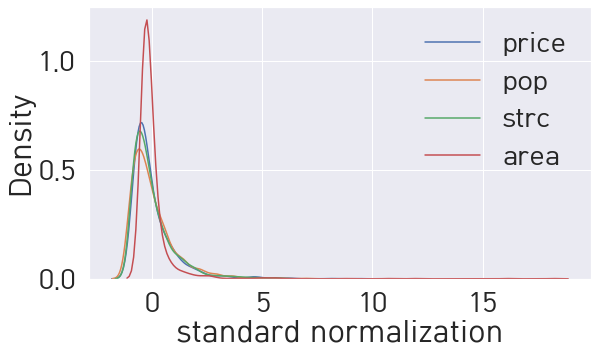

In [27]:
# create a figure
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(comm_max_s_201912['price_201912_standard'], ax=ax)
sns.kdeplot(comm_max_s_201912['pop_201912_standard'], ax=ax)
sns.kdeplot(comm_max_s_201912['strc_201912_standard'], ax=ax)
sns.kdeplot(comm_max_s_201912['area_standard'], ax=ax)
plt.legend(['price', 'pop', 'strc', 'area'])
plt.xlabel('standard normalization')
plt.show()

# 엔트로피 가중치 

## entropy 계산

In [28]:
# 엔트로피 계산 방법
# entropy = - 합(값*log(값))/log(데이터 개수)

price = comm_max_m_201912['price_201912_minmax'] #전처리 값
multiply = np.log(price)*price

pd.DataFrame(
    {'price': price, 
     'log': np.log(price), 
     'multiply':multiply,
     'numerator' : multiply.sum(),
     'denominator' : np.log(len(price)),
     'entropy': -(multiply.sum()/np.log(len(price)))})

,price,log,multiply,numerator,denominator,entropy
0,0.1682042,-1.7825765,-0.2998369,-360.9295916,7.4289272,48.5843490
1,0.1184840,-2.1329773,-0.2527237,-360.9295916,7.4289272,48.5843490
2,0.0700371,-2.6587295,-0.1862098,-360.9295916,7.4289272,48.5843490
3,0.0427626,-3.1520910,-0.1347917,-360.9295916,7.4289272,48.5843490
4,0.0548833,-2.9025454,-0.1593014,-360.9295916,7.4289272,48.5843490
...,...,...,...,...,...,...
1679,0.1649944,-1.8018438,-0.2972941,-360.9295916,7.4289272,48.5843490
1680,0.0723199,-2.6266561,-0.1899595,-360.9295916,7.4289272,48.5843490
1681,0.1271713,-2.0622204,-0.2622552,-360.9295916,7.4289272,48.5843490
1682,0.1202856,-2.1178865,-0.2547512,-360.9295916,7.4289272,48.5843490


In [29]:
# 엔트로피를 구하는 함수
def entropy(df):
    temp_df = df.iloc[:, -4:] # 대상값
    entropy = []
    for i in temp_df.columns:
        numerator = (np.log(temp_df[i])*temp_df[i]).sum()
        denominator = np.log(len(temp_df[i]))
        entropy.append(-numerator/denominator)
    return entropy

In [30]:
entropy(comm_max_m_201912)

[48.5843490119784, 52.14129233374689, 45.65297760682796, 16.57902653314975]

## 가중치 계산

In [31]:
entropy_201912 = entropy(comm_max_m_201912)

In [32]:
# 가중치 = (1 - entropy) / (변수 개수 - entropy 합)
# 분자 = 다양성을 나타냄
diversity = [1 - e for e in entropy_201912]
diversity

[-47.5843490119784, -51.14129233374689, -44.65297760682796, -15.57902653314975]

In [33]:
sum(diversity)

-158.95764548570298

In [34]:
diversity/sum(diversity)

array([0.29935238, 0.32172905, 0.28091117, 0.09800741])

In [35]:
# 가중치 구하는 함수
def weight(df):
    temp_df = df.iloc[:, -4:] # 대상값
    entropy = []
    
    # 엔트로피
    for i in temp_df.columns:
        numerator = (np.log(temp_df[i])*temp_df[i]).sum()
        denominator = np.log(len(temp_df[i]))
        entropy.append(-numerator/denominator)
    
    # 가중치
    diversity = [1-e for e in entropy]
    weight = diversity/sum(diversity)
    return weight
    

In [36]:
weight(comm_max_m_201912)

array([0.29935238, 0.32172905, 0.28091117, 0.09800741])

In [37]:
weight(comm_max_m_201912).sum()

1.0

## 상권활성도 도출

In [38]:
comm_max_m_201912.iloc[:, -4:]

,price_201912_minmax,pop_201912_minmax,strc_201912_minmax,area_minmax
0,0.1682042,0.3241772,0.1780012,0.0226560
1,0.1184840,0.2589163,0.2525133,0.0121034
2,0.0700371,0.1803279,0.1963335,0.1466707
3,0.0427626,0.0036917,0.0212892,0.0536162
4,0.0548833,0.2495933,0.0904790,0.0111691
...,...,...,...,...
1679,0.1649944,0.2073583,0.1632170,0.0064501
1680,0.0723199,0.0618821,0.0118273,0.0014828
1681,0.1271713,0.1185083,0.0112360,0.0093077
1682,0.1202856,0.0205231,0.0431697,0.0109647


In [39]:
comm_max_m_201912.iloc[:, -4:].iloc[0]

price_201912_minmax   0.1682042
pop_201912_minmax     0.3241772
strc_201912_minmax    0.1780012
area_minmax           0.0226560
Name: 0, dtype: float64

In [40]:
weight(comm_max_m_201912)

array([0.29935238, 0.32172905, 0.28091117, 0.09800741])

In [41]:
0.168204*0.29935238+0.324177*0.32172905+0.178001*0.28091117+0.022656*0.09800741

0.2068723510195

In [42]:
(comm_max_m_201912.iloc[:, -4:].iloc[0]*weight(comm_max_m_201912)).sum()

0.20687252456272054

In [43]:
### 상권활성도 도출 함수
def activity_index_entropy(df):
    # entropy 계산
    temp_df = df.iloc[:,-4:]  # 엔트로피 대상 컬럼들만 추출, 데이터마다 수정
    
    entropy = []
    for i in temp_df.columns:
        numerator = (np.log(temp_df[i])*temp_df[i]).sum() #분자 , 로그된 값과 원래값 곱한 합
        denominator = np.log(len(temp_df[i])) #분모, 컬럼의 행 길이 로그 값
        entropy.append(-numerator/denominator) #컬럼 별 엔트로피 생성

    ### 가중치 계산
    d = [1 - e for e in entropy]
    weight = d/sum(d)

    ### 활성도 도출
    temp_list = []
    for j in range(len(temp_df)): # 행 개수
        score = (temp_df.iloc[j,:]*weight).sum() # sum(개별변수 * 변수 가중치) = 상권활성도
        temp_list.append(score)
    activity_index = temp_list #상권활성도
    return activity_index

In [44]:
activity_index_entropy(comm_max_m_201912)

[0.20687252456272054,
 0.19088938720714532,
 0.14850959691162796,
 0.025223959031370594,
 0.1232420943297889,
 0.03341587865046622,
 0.499391798261856,
 0.04677215194988087,
 0.20578757014070362,
 0.10870992358443575,
 0.05251288785663029,
 0.1067349314087887,
 0.10488104558397904,
 0.08893326384766392,
 0.1149631630906068,
 0.04350939631650322,
 0.09540279865733538,
 0.09889116278749205,
 0.047536894563514315,
 0.0915907958332021,
 0.06707668192011082,
 0.08439970314389904,
 0.030534100362470867,
 0.11114762250530554,
 0.13987335593086248,
 0.06902486325531412,
 0.13243036120814772,
 0.13977310630806394,
 0.034080017339397646,
 0.03187014832875476,
 0.05861468544565116,
 0.0768817508064351,
 0.010950574348766944,
 0.09489223476145364,
 0.17681003129635536,
 0.03693227826632166,
 0.028675437221032413,
 0.1277010760755161,
 0.10238428120675389,
 0.10500543590248575,
 0.06649232730441454,
 0.061096158377455814,
 0.1646762715686077,
 0.22133735997056,
 0.3542204406894831,
 0.1463225863381

# 연도별 상권활성도 도출

1. 총인구수, 건축물수, 공시지가 데이터를 포인트가 아닌 격자기준으로 결합한 데이터 이용  
2. 총인구수, 건축물수, 공시지가, area 컬럼을 minmax scaling한 데이터를 이용하여 엔트로피 가중치 구함  
3. 엔트로피 가중치를 이용하여 구한 가중치와 표준화(minmax scaling)한 데이터를 곱하여 상권활성도 도출  

In [45]:
max_minmax_cvi = pd.DataFrame({'cvi_201706': activity_index_entropy(comm_max_m_201706),
              'cvi_201712': activity_index_entropy(comm_max_m_201712),
              'cvi_201806': activity_index_entropy(comm_max_m_201806),
              'cvi_201812': activity_index_entropy(comm_max_m_201812),
              'cvi_201906': activity_index_entropy(comm_max_m_201906),
              'cvi_201912': activity_index_entropy(comm_max_m_201912),
              'cvi_202006': activity_index_entropy(comm_max_m_202006),
              'cvi_202012': activity_index_entropy(comm_max_m_202012),
              'cvi_202106': activity_index_entropy(comm_max_m_202106),
              'cvi_202112': activity_index_entropy(comm_max_m_202112),
             })
max_minmax_cvi.index = comm_max_m_201712['상권명']
max_minmax_cvi.reset_index(level=['상권명'], inplace = True) 
max_minmax_cvi

,상권명,cvi_201706,cvi_201712,cvi_201806,cvi_201812,cvi_201906,cvi_201912,cvi_202006,cvi_202012,cvi_202106,cvi_202112
0,성남은행초등학교,0.2136028,0.2037806,0.2056494,0.2067220,0.2056122,0.2068725,0.2060586,0.2092522,0.2101958,0.2314188
1,가림로201번안길,0.1694751,0.1891458,0.1895467,0.1912922,0.1889709,0.1908894,0.1914772,0.1900351,0.1889652,0.2215647
2,내각1로73번안길,0.1296554,0.1458644,0.1462982,0.1480275,0.1481097,0.1485096,0.1487065,0.1508015,0.1535988,0.1906545
3,양주산성로,0.0263922,0.0232379,0.0230988,0.0238933,0.0248428,0.0252240,0.0263729,0.0249928,0.0252217,0.0221213
4,도일로135번길,0.1374691,0.1242269,0.1243027,0.1234048,0.1230515,0.1232421,0.1230022,0.1158475,0.1161636,0.1443491
...,...,...,...,...,...,...,...,...,...,...,...
1679,광명사거리역_4번출구,0.1581189,0.1582211,0.1586456,0.1609076,0.1619224,0.1625863,0.1639010,0.1549760,0.1549404,0.1564281
1680,성복2로,0.0571554,0.0435326,0.0443198,0.0442720,0.0448543,0.0450262,0.0453950,0.0448275,0.0441232,0.0339210
1681,광교중앙로,0.0938240,0.0725938,0.0730885,0.0767695,0.0794975,0.0802651,0.0816444,0.0817038,0.0822484,0.0674038
1682,서수원버스터미널,0.0584769,0.0546258,0.0546541,0.0548730,0.0555344,0.0558121,0.0562896,0.0542731,0.0544291,0.0299381
